# Machine Learning Assignment Project: Titanic Disaster Survival Prediction

## Import libraries

In [32]:
# Import libraries
import os, shutil
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

## Import dataset

In [17]:
# Import libraries
import kaggle
import zipfile
import os

data_dir = "./data/"
os.makedirs(data_dir, exist_ok=True)

kaggle.api.competition_download_files('titanic', path=data_dir)

In [19]:
# Unzip the downloaded file
def unzip_file(zip_src, dst_dir):
    with zipfile.ZipFile(zip_src, 'r') as zf:
        zf.extractall(dst_dir)
        
    # remove the zip file after extraction
    os.remove(zip_src)
        
unzip_file(os.path.join(data_dir, 'titanic.zip'), data_dir)
!ls ./data

gender_submission.csv  test.csv  train.csv


### Load the train dataset

In [34]:
df = pd.read_csv('./data/train.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data preprocessing
This is work-flow of this section:
1. Import libraries and dataset
2. Data exploration
3. Split features and labels
4. Split training, validation and test sets
5. Handle missing values
6. Clean up data (drop unuseful columns)
7. Encode categorical features
8. Feature scaling

## Data exploration

In [30]:
print(f"Dataset shape: {df.shape}")
df.info()
df.describe(include='all')

Dataset shape: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN



Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Survival rate:
Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

Statistical summary:
       PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ..

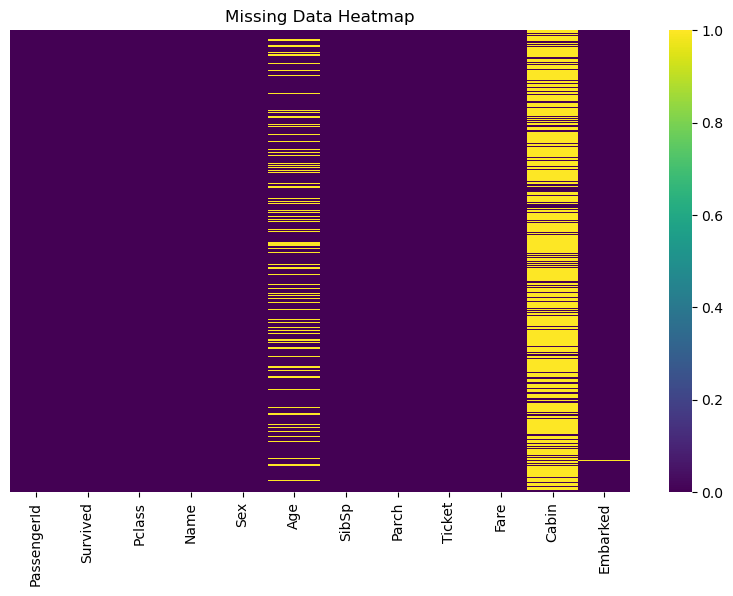

In [31]:
print("\nMissing values:")
print(df.isnull().sum())

print("\nSurvival rate:")
print(df['Survived'].value_counts(normalize=True))

print("\nStatistical summary:")
print(df.describe())

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

## Features and labels split

In [26]:
# Features of dataset
X = df.drop('Survived', axis=1)
# Labels of dataset
y = df['Survived']

print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")

Features shape: (891, 11)
Labels shape: (891,)


## Split training, validation and test sets

In [28]:
# First split into training and temp (validation + test) sets (80% train, 20% temp)
split_ratio = 0.2
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=split_ratio, random_state=42, stratify=y)

# Now split temp into validation and test sets (50% val, 50% test of temp)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (712, 11), (712,)
Validation set shape: (89, 11), (89,)
Test set shape: (90, 11), (90,)


## Handle missing values

In [37]:
def handle_missing_values(X_train, X_val, X_test):
    """Handle missing values for all sets consistently"""
    
    # Make copies to avoid modifying original data
    X_train_processed = X_train.copy()
    X_val_processed = X_val.copy()
    X_test_processed = X_test.copy()
    
    # --- Handle Age: median imputation ---
    age_imputer = SimpleImputer(strategy="median")
    X_train_processed["Age"] = age_imputer.fit_transform(X_train_processed[["Age"]]).ravel()
    X_val_processed["Age"]   = age_imputer.transform(X_val_processed[["Age"]]).ravel()
    X_test_processed["Age"]  = age_imputer.transform(X_test_processed[["Age"]]).ravel()
    
    # --- Handle Embarked: fill with mode from training set ---
    embarked_mode = (
        X_train_processed["Embarked"].mode()[0] 
        if not X_train_processed["Embarked"].mode().empty 
        else "S"
    )
    X_train_processed["Embarked"] = X_train_processed["Embarked"].fillna(embarked_mode)
    X_val_processed["Embarked"]   = X_val_processed["Embarked"].fillna(embarked_mode)
    X_test_processed["Embarked"]  = X_test_processed["Embarked"].fillna(embarked_mode)
    
    # --- Handle Cabin ---
    # Create binary feature Has_Cabin
    X_train_processed["Has_Cabin"] = X_train_processed["Cabin"].notna().astype(int)
    X_val_processed["Has_Cabin"]   = X_val_processed["Cabin"].notna().astype(int)
    X_test_processed["Has_Cabin"]  = X_test_processed["Cabin"].notna().astype(int)
    
    # Fill missing Cabin with "Unknown"
    X_train_processed["Cabin"] = X_train_processed["Cabin"].fillna("Unknown")
    X_val_processed["Cabin"]   = X_val_processed["Cabin"].fillna("Unknown")
    X_test_processed["Cabin"]  = X_test_processed["Cabin"].fillna("Unknown")
    
    # --- Handle Fare: median imputation ---
    fare_median = X_train_processed["Fare"].median()
    X_train_processed["Fare"] = X_train_processed["Fare"].fillna(fare_median)
    X_val_processed["Fare"]   = X_val_processed["Fare"].fillna(fare_median)
    X_test_processed["Fare"]  = X_test_processed["Fare"].fillna(fare_median)
    
    return X_train_processed, X_val_processed, X_test_processed

In [38]:
X_train, X_val, X_test = handle_missing_values(X_train, X_val, X_test)

print("Missing values after handling:")
print("Training set:", X_train.isnull().sum().sum())
print("Validation set:", X_val.isnull().sum().sum())
print("Test set:", X_test.isnull().sum().sum())

Missing values after handling:
Training set: 0
Validation set: 0
Test set: 0
